In [1]:
import time
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_df():
    initial_pop = [50, 100, 500, 1000, 5000]
    initial_chromosome = [4, 8, 16, 32]
    mutation_prob = [0.004, 0.01, 0.02, 0.1]
    crossover_prob = [0.04, 0.1, 0.2]
    puzzles = [1] + [i for i in range(3,21)]

    final_df = pd.DataFrame()

    for pop in initial_pop:
        for chrom in initial_chromosome:
            for mutation in mutation_prob:
                for crossover in crossover_prob:
                    for rept in range(0,5):
                        for puzzle in puzzles:
                            exec = './main puzzles/puzzle{}.txt {} {} {} {}'.format(puzzle, pop, chrom, crossover, mutation)
                            print(exec)

                            start = time.time()
                            a = subprocess.getoutput(exec)
                            end = time.time()

                            results = pd.read_csv('results.txt', sep=' ').iloc[:, :3]
                            results.columns = ['generation', 'avg_fitness', 'max_fitness']
                            final_df = final_df.append({'n_steps': results.iloc[-1, 1], 'n_generations': len(results)-1, 'pop_size': pop, 
                                            'choromosome_size': chrom, 'mutation_prob': mutation, 'crossover_prob': crossover,
                                            'avg_fitness': list(results['avg_fitness']), 'max_fitness': list(results['max_fitness']), 
                                            'time': end-start, 'puzzle': puzzle}, ignore_index=True)
    final_df

In [3]:
#final_df.to_csv('final_df_with_time.csv', sep=';', index=False)

# Analysis

In [4]:
df = pd.read_csv('final_df_with_time.csv', sep=';')
df = df[df['pop_size'] != 5000]
df.head()

,avg_fitness,choromosome_size,crossover_prob,max_fitness,mutation_prob,n_generations,n_steps,pop_size,puzzle,time
0,"[0.0579, 0.059000000000000004, 0.0613, 0.0646,...",4.0,0.04,"[0.0625, 0.0714, 0.0833, 0.0714, 0.0833, 0.083...",0.004,47.0,48.0,50.0,1.0,0.197752
1,"[0.0767, 0.083, 0.0878, 0.0822, 0.0806, 0.0789...",4.0,0.04,"[0.0833, 0.1, 0.125, 0.125, 0.125, 0.125, 0.12...",0.004,39.0,15.0,50.0,3.0,0.131664
2,"[0.0537, 0.0553, 0.0604, 0.0595, 0.0603, 0.061...",4.0,0.04,"[0.0625, 0.0625, 0.0714, 0.0714, 0.0714, 0.083...",0.004,215.0,216.0,50.0,4.0,2.030279
3,"[0.0646, 0.0654, 0.0706, 0.0709, 0.0717, 0.073...",4.0,0.04,"[0.0714, 0.0833, 0.1, 0.0833, 0.0833, 0.1, 0.1...",0.004,77.0,78.0,50.0,5.0,0.334914
4,"[0.0679, 0.065, 0.0664, 0.0631, 0.0634, 0.0627...",4.0,0.04,"[0.0833, 0.0714, 0.0833, 0.0714, 0.0833, 0.071...",0.004,65.0,66.0,50.0,6.0,0.295794


# Verificando a influência do tamanho da população no geral

In [5]:
df['pop_size'].unique()

array([  50.,  100.,  500., 1000.])

In [6]:
print(df.groupby('pop_size')['time'].mean())
print(df.groupby('pop_size')['n_steps'].mean())

pop_size
50.0      0.573935
100.0     0.529129
500.0     0.912328
1000.0    1.015809
Name: time, dtype: float64
pop_size
50.0      81.166667
100.0     51.577193
500.0     29.860965
1000.0    26.813596
Name: n_steps, dtype: float64


In [7]:
print(df.groupby('pop_size')['time'].median())
print(df.groupby('pop_size')['n_steps'].median())

pop_size
50.0      0.327723
100.0     0.366263
500.0     0.815582
1000.0    0.964042
Name: time, dtype: float64
pop_size
50.0      66.0
100.0     45.0
500.0     29.0
1000.0    27.0
Name: n_steps, dtype: float64


Text(0.5, 1.0, 'Population 1000')

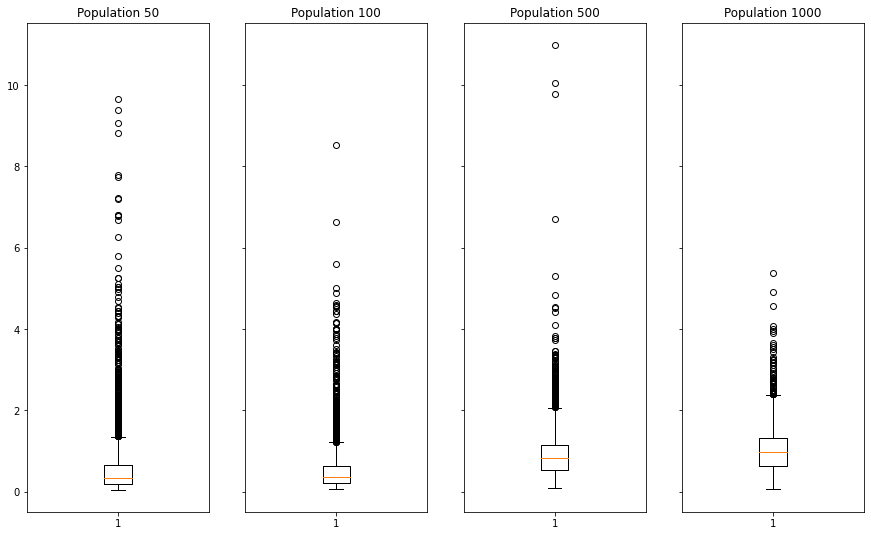

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['pop_size'] == 50]['time'])
axs[0].set_title('Population 50')

axs[1].boxplot(df[df['pop_size'] == 100]['time'])
axs[1].set_title('Population 100')

axs[2].boxplot(df[df['pop_size'] == 500]['time'])
axs[2].set_title('Population 500')

axs[3].boxplot(df[df['pop_size'] == 1000]['time'])
axs[3].set_title('Population 1000')

Text(0.5, 1.0, 'Population 1000')

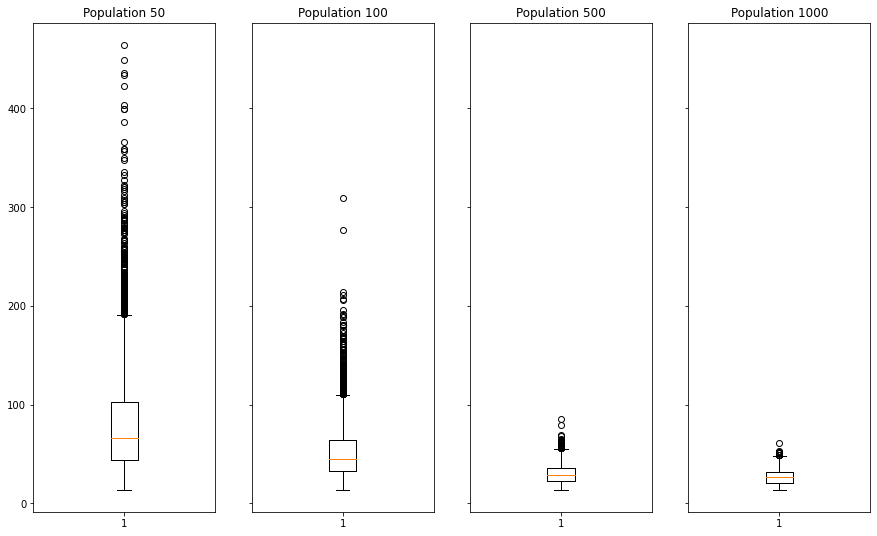

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['pop_size'] == 50]['n_steps'])
axs[0].set_title('Population 50')

axs[1].boxplot(df[df['pop_size'] == 100]['n_steps'])
axs[1].set_title('Population 100')

axs[2].boxplot(df[df['pop_size'] == 500]['n_steps'])
axs[2].set_title('Population 500')

axs[3].boxplot(df[df['pop_size'] == 1000]['n_steps'])
axs[3].set_title('Population 1000')

No quesito de tempo, nada fica claro. Mas vemos que quanto maior a população, menor o número de passos.

# Verificando o tamanho inicial do cromossomo no geral

In [10]:
df['choromosome_size'].unique()

array([ 4.,  8., 16., 32.])

In [11]:
print(df.groupby('choromosome_size')['time'].mean())
print(df.groupby('choromosome_size')['n_steps'].mean())

choromosome_size
4.0     0.775157
8.0     0.759868
16.0    0.716336
32.0    0.779840
Name: time, dtype: float64
choromosome_size
4.0     45.795614
8.0     46.222368
16.0    46.717105
32.0    50.683333
Name: n_steps, dtype: float64


In [12]:
print(df.groupby('choromosome_size')['time'].median())
print(df.groupby('choromosome_size')['n_steps'].median())

choromosome_size
4.0     0.597674
8.0     0.614017
16.0    0.576472
32.0    0.611263
Name: time, dtype: float64
choromosome_size
4.0     34.0
8.0     33.0
16.0    34.0
32.0    37.0
Name: n_steps, dtype: float64


Text(0.5, 1.0, 'Chromosome Size 32')

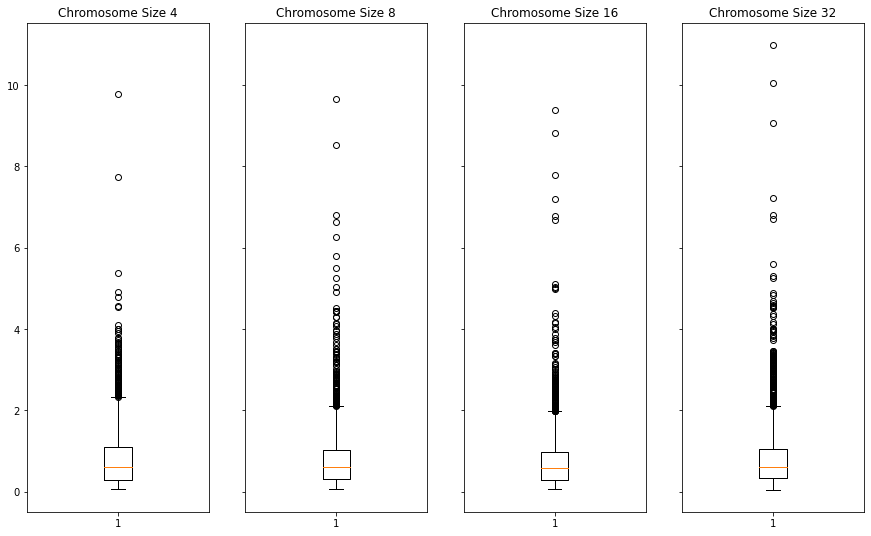

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['choromosome_size'] == 4]['time'])
axs[0].set_title('Chromosome Size 4')

axs[1].boxplot(df[df['choromosome_size'] == 8]['time'])
axs[1].set_title('Chromosome Size 8')

axs[2].boxplot(df[df['choromosome_size'] == 16]['time'])
axs[2].set_title('Chromosome Size 16')

axs[3].boxplot(df[df['choromosome_size'] == 32]['time'])
axs[3].set_title('Chromosome Size 32')

Text(0.5, 1.0, 'Chromosome Size 32')

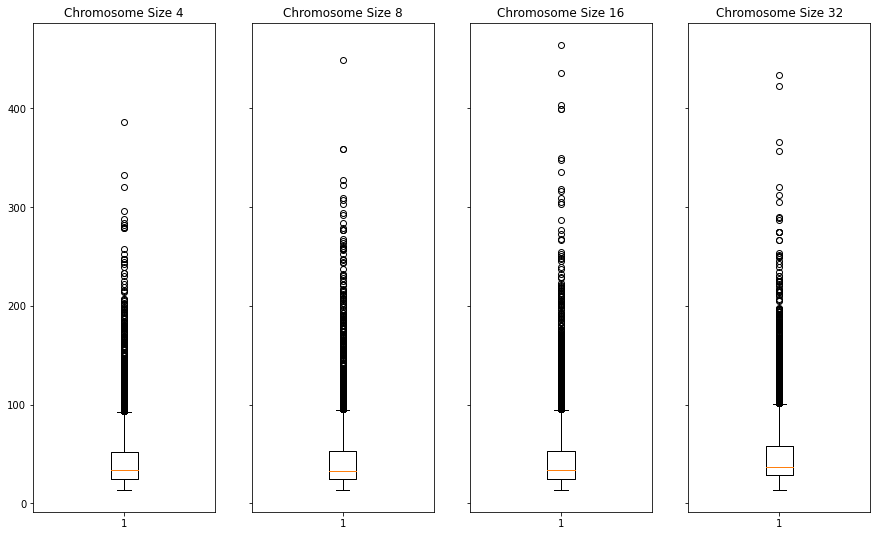

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['choromosome_size'] == 4]['n_steps'])
axs[0].set_title('Chromosome Size 4')

axs[1].boxplot(df[df['choromosome_size'] == 8]['n_steps'])
axs[1].set_title('Chromosome Size 8')

axs[2].boxplot(df[df['choromosome_size'] == 16]['n_steps'])
axs[2].set_title('Chromosome Size 16')

axs[3].boxplot(df[df['choromosome_size'] == 32]['n_steps'])
axs[3].set_title('Chromosome Size 32')

Não parece, pelos boxplots, ter diferença estatisticamente significante, tanto para tempo como para número de passos.

# Verificando a taxa de crossover

In [15]:
df['crossover_prob'].unique()

array([0.04, 0.1 , 0.2 ])

In [16]:
print(df.groupby('crossover_prob')['time'].mean())
print(df.groupby('crossover_prob')['n_steps'].mean())

crossover_prob
0.04    0.763225
0.10    0.763488
0.20    0.746688
Name: time, dtype: float64
crossover_prob
0.04    48.225658
0.10    47.785526
0.20    46.052632
Name: n_steps, dtype: float64


In [17]:
print(df.groupby('crossover_prob')['time'].median())
print(df.groupby('crossover_prob')['n_steps'].median())

crossover_prob
0.04    0.598257
0.10    0.603839
0.20    0.590248
Name: time, dtype: float64
crossover_prob
0.04    35.0
0.10    35.0
0.20    34.0
Name: n_steps, dtype: float64


Text(0.5, 1.0, 'Crossover Prob 0.2')

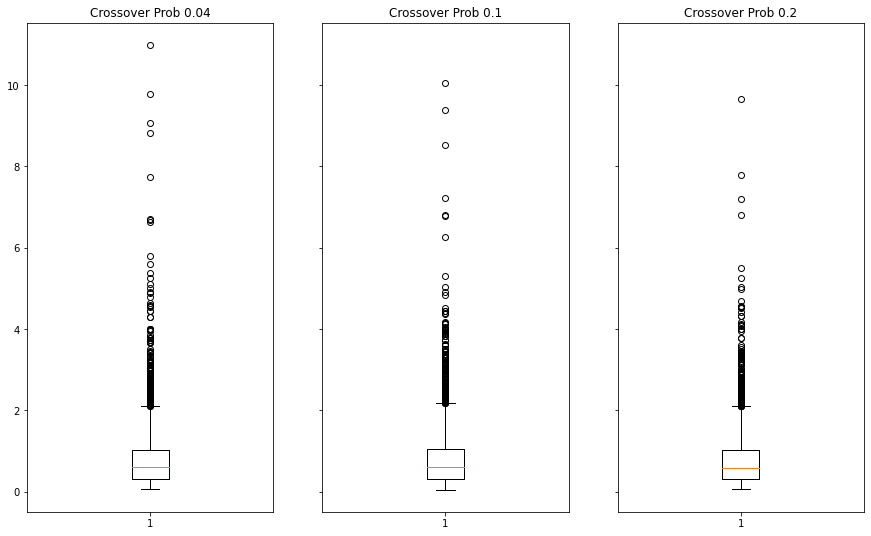

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['crossover_prob'] == 0.04]['time'])
axs[0].set_title('Crossover Prob 0.04')

axs[1].boxplot(df[df['crossover_prob'] == 0.1]['time'])
axs[1].set_title('Crossover Prob 0.1')

axs[2].boxplot(df[df['crossover_prob'] == 0.2]['time'])
axs[2].set_title('Crossover Prob 0.2')

Text(0.5, 1.0, 'Crossover Prob 0.2')

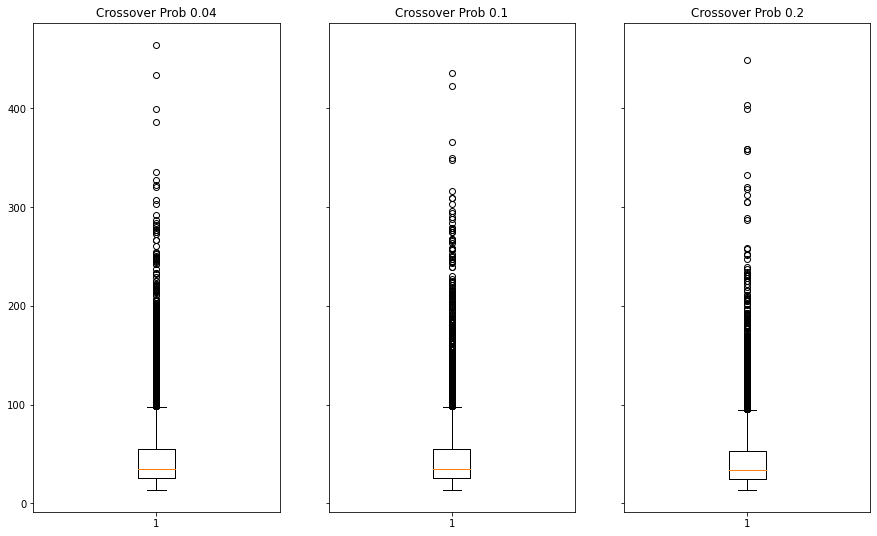

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['crossover_prob'] == 0.04]['n_steps'])
axs[0].set_title('Crossover Prob 0.04')

axs[1].boxplot(df[df['crossover_prob'] == 0.1]['n_steps'])
axs[1].set_title('Crossover Prob 0.1')

axs[2].boxplot(df[df['crossover_prob'] == 0.2]['n_steps'])
axs[2].set_title('Crossover Prob 0.2')

Também não parece influenciar

# Taxa de Mutação

In [20]:
df['mutation_prob'].unique()

array([0.004, 0.01 , 0.02 , 0.1  ])

In [21]:
print(df.groupby('mutation_prob')['time'].mean())
print(df.groupby('mutation_prob')['n_steps'].mean())

mutation_prob
0.004    0.755399
0.010    0.763051
0.020    0.744783
0.100    0.767969
Name: time, dtype: float64
mutation_prob
0.004    47.686404
0.010    47.687281
0.020    47.333333
0.100    46.711404
Name: n_steps, dtype: float64


In [22]:
print(df.groupby('mutation_prob')['time'].median())
print(df.groupby('mutation_prob')['n_steps'].median())

mutation_prob
0.004    0.601410
0.010    0.597560
0.020    0.590394
0.100    0.602992
Name: time, dtype: float64
mutation_prob
0.004    35.0
0.010    35.0
0.020    35.0
0.100    35.0
Name: n_steps, dtype: float64


Text(0.5, 1.0, 'Mutation Prob 0.1')

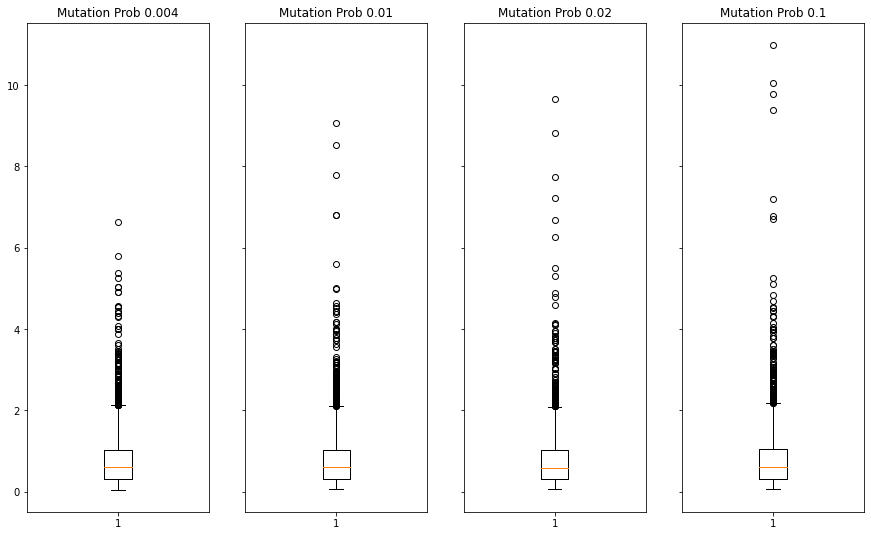

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['mutation_prob'] == 0.004]['time'])
axs[0].set_title('Mutation Prob 0.004')

axs[1].boxplot(df[df['mutation_prob'] == 0.01]['time'])
axs[1].set_title('Mutation Prob 0.01')

axs[2].boxplot(df[df['mutation_prob'] == 0.02]['time'])
axs[2].set_title('Mutation Prob 0.02')

axs[3].boxplot(df[df['mutation_prob'] == 0.1]['time'])
axs[3].set_title('Mutation Prob 0.1')

Text(0.5, 1.0, 'Mutation Prob 0.1')

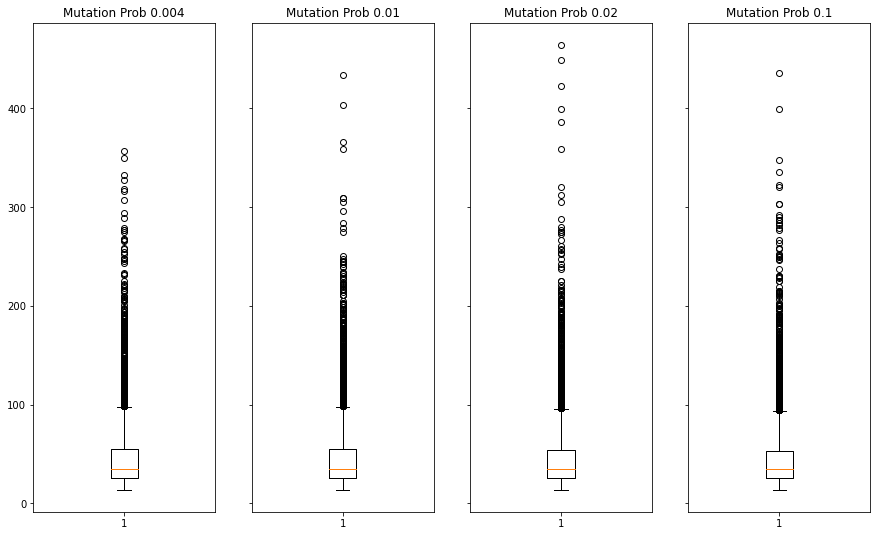

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(15,9), sharey = True)

axs[0].boxplot(df[df['mutation_prob'] == 0.004]['n_steps'])
axs[0].set_title('Mutation Prob 0.004')

axs[1].boxplot(df[df['mutation_prob'] == 0.01]['n_steps'])
axs[1].set_title('Mutation Prob 0.01')

axs[2].boxplot(df[df['mutation_prob'] == 0.02]['n_steps'])
axs[2].set_title('Mutation Prob 0.02')

axs[3].boxplot(df[df['mutation_prob'] == 0.1]['n_steps'])
axs[3].set_title('Mutation Prob 0.1')

Tá tudo muito parecido, não dá pra tirar nenhum insight disso.

## Tentando analisar por puzzles

Vamos pegar o puzzle com menor tempo médio e número de passos médio e ver como os parâmetros se comportam

In [25]:
df.groupby('puzzle')[['time', 'n_steps']].mean().sort_values('n_steps').reset_index()

,puzzle,time,n_steps
0,7.0,0.309142,26.285417
1,3.0,0.427238,33.731250
2,20.0,0.435434,34.112500
3,18.0,0.570511,40.029167
4,8.0,0.539482,40.206250
5,11.0,0.598578,43.185417
6,1.0,0.650574,46.762500
7,5.0,0.744836,48.591667
8,9.0,0.816226,48.943750
9,16.0,0.847962,51.295833


#### Para o puzzle 7

In [26]:
df_7 = df[df['puzzle'] == 7]
df_7

,avg_fitness,choromosome_size,crossover_prob,max_fitness,mutation_prob,n_generations,n_steps,pop_size,puzzle,time
5,"[0.0648, 0.0649, 0.0705, 0.0697, 0.0719, 0.072...",4.0,0.04,"[0.0714, 0.0714, 0.0833, 0.1, 0.125, 0.125, 0....",0.004,35.0,36.0,50.0,7.0,0.128203
24,"[0.0645, 0.0668, 0.0729, 0.0757, 0.0798, 0.081...",4.0,0.04,"[0.0714, 0.0714, 0.0833, 0.1, 0.125, 0.125, 0....",0.004,51.0,52.0,50.0,7.0,0.209049
43,"[0.0645, 0.066, 0.071, 0.0701, 0.0764, 0.0836,...",4.0,0.04,"[0.0714, 0.0714, 0.0833, 0.1, 0.125, 0.1, 0.12...",0.004,15.0,16.0,50.0,7.0,0.144861
62,"[0.0643, 0.0641, 0.0703, 0.0727, 0.0759, 0.077...",4.0,0.04,"[0.0714, 0.0714, 0.0833, 0.1, 0.125, 0.1, 0.12...",0.004,123.0,124.0,50.0,7.0,0.771404
81,"[0.0646, 0.0653, 0.0707, 0.0737, 0.0799, 0.078...",4.0,0.04,"[0.0714, 0.0714, 0.0833, 0.1, 0.125, 0.1, 0.12...",0.004,13.0,14.0,50.0,7.0,0.097570
...,...,...,...,...,...,...,...,...,...,...
18150,"[0.0702, 0.0739, inf, 18.0]",32.0,0.20,"[0.25, 0.5, inf, nan]",0.100,3.0,18.0,1000.0,7.0,0.175440
18169,"[0.0696, 0.0731, 0.0774, 0.0778, 0.0811, 0.081...",32.0,0.20,"[0.25, 0.16699999999999998, 0.25, 0.1669999999...",0.100,8.0,14.0,1000.0,7.0,0.489064
18188,"[0.0704, 0.07200000000000001, 0.0757, 0.0763, ...",32.0,0.20,"[0.16699999999999998, 0.16699999999999998, 0.2...",0.100,7.0,22.0,1000.0,7.0,0.399491
18207,"[0.0699, 0.073, inf, 18.0]",32.0,0.20,"[0.25, 0.5, inf, nan]",0.100,3.0,18.0,1000.0,7.0,0.153544


Text(0.5, 1.0, 'Time for puzzle 7')

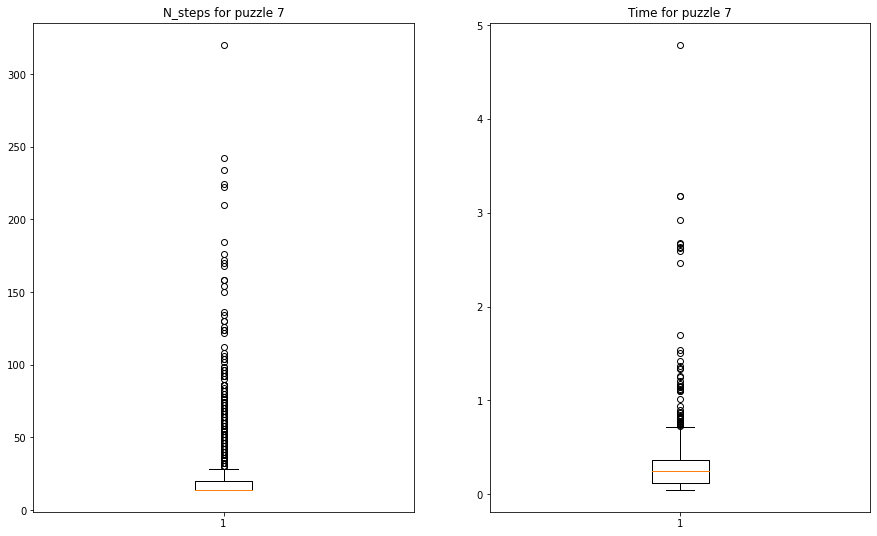

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,9))

axs[0].boxplot(df_7['n_steps'])
axs[0].set_title('N_steps for puzzle 7')

axs[1].boxplot(df_7['time'])
axs[1].set_title('Time for puzzle 7')

In [28]:
df_7_grouped = df_7.groupby(['choromosome_size', 'crossover_prob', 'mutation_prob', 'pop_size'])[['n_steps', 'time']].mean().reset_index().sort_values('n_steps')

Text(0, 0.5, 'N Steps')

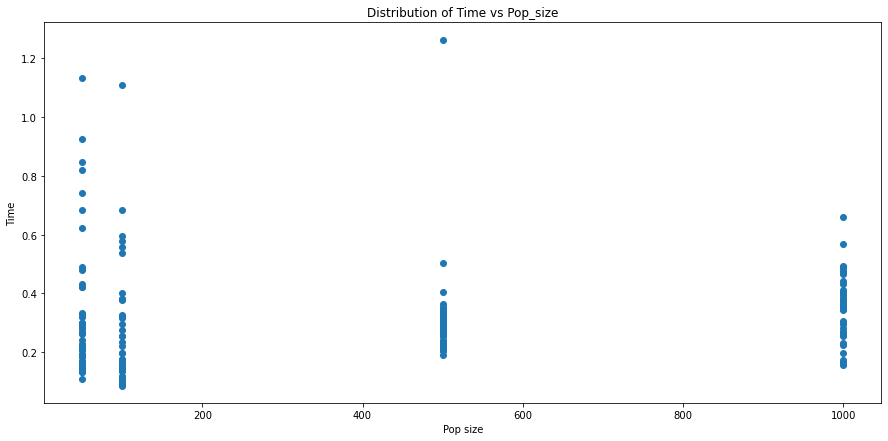

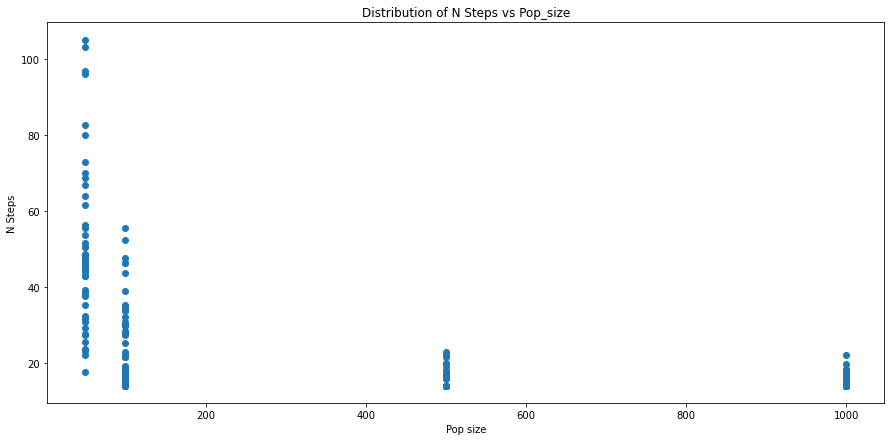

In [29]:
plt.figure(figsize=(15,7))
plt.plot(df_7_grouped['pop_size'], df_7_grouped['time'], 'o')
plt.title('Distribution of Time vs Pop_size')
plt.xlabel('Pop size')
plt.ylabel('Time')

plt.figure(figsize=(15,7))
plt.plot(df_7_grouped['pop_size'], df_7_grouped['n_steps'], 'o')
plt.title('Distribution of N Steps vs Pop_size')
plt.xlabel('Pop size')
plt.ylabel('N Steps')

Text(0, 0.5, 'N Steps')

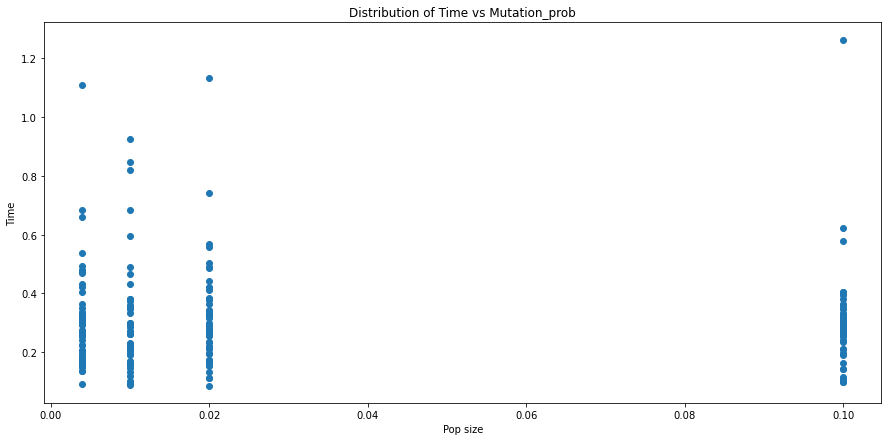

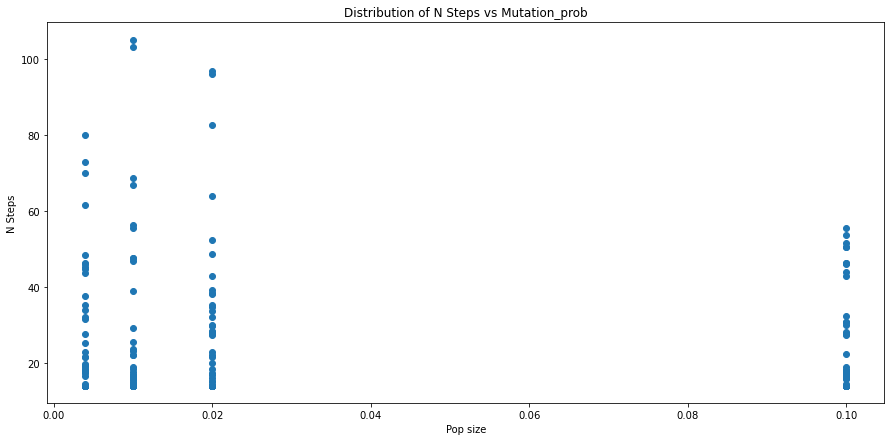

In [30]:
plt.figure(figsize=(15,7))
plt.plot(df_7_grouped['mutation_prob'], df_7_grouped['time'], 'o')
plt.title('Distribution of Time vs Mutation_prob')
plt.xlabel('Pop size')
plt.ylabel('Time')

plt.figure(figsize=(15,7))
plt.plot(df_7_grouped['mutation_prob'], df_7_grouped['n_steps'], 'o')
plt.title('Distribution of N Steps vs Mutation_prob')
plt.xlabel('Pop size')
plt.ylabel('N Steps')

## Vendo curvas de fitness para casos aleatórios

avg_fitness         [0.0596, 0.059000000000000004, 0.0602, 0.0595,...
choromosome_size                                                    4
crossover_prob                                                    0.1
max_fitness         [0.0714, 0.0625, 0.0714, 0.0833, 0.1, 0.0833, ...
mutation_prob                                                    0.02
n_generations                                                      45
n_steps                                                            46
pop_size                                                          500
puzzle                                                              9
time                                                          1.81685
Name: 9811, dtype: object
avg_fitness         [0.0656, 0.0691, 0.0677, 0.0685, 0.0664, 0.068...
choromosome_size                                                   16
crossover_prob                                                    0.2
max_fitness         [0.0833, 0.1, 0.1, 0.125, 0.1, 0.1, 0.125, 0

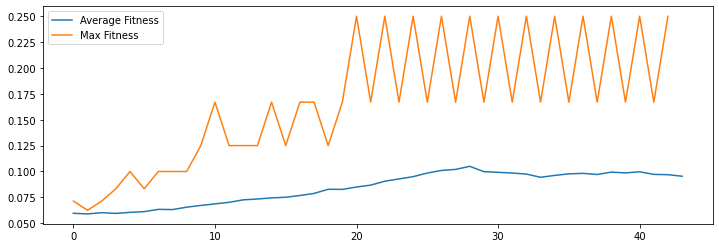

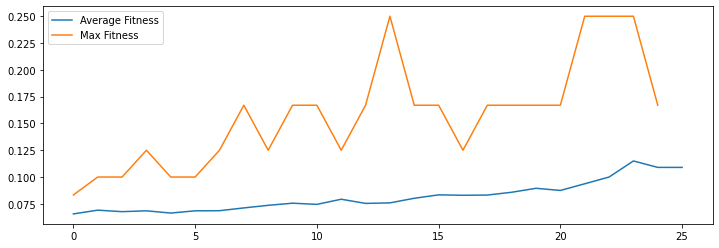

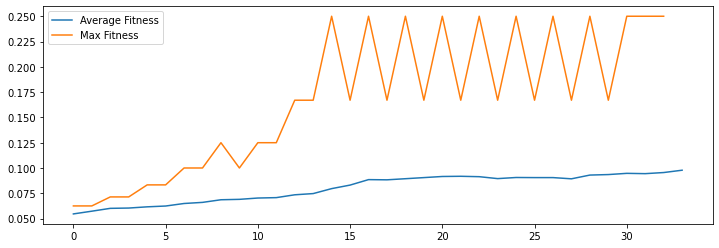

In [31]:
import ast

for idx, row in df.sample(3).iterrows():
    plt.figure(figsize=(12,4))
    size1 = [i for i in range(0,len(ast.literal_eval(row['avg_fitness'].replace('inf,', ''))))]
    size2 = [i for i in range(0,len(ast.literal_eval(row['max_fitness'].replace('inf,', '').replace('nan', ''))))]
    plt.plot(size1[:-1],ast.literal_eval(row['avg_fitness'].replace('inf,', ''))[:-1])
    plt.plot(size2[:-1],ast.literal_eval(row['max_fitness'].replace('inf,', '').replace('nan', ''))[:-1])
    plt.legend(['Average Fitness', 'Max Fitness'])
    print(row)

plt.show()